In [3]:
import pandas as pd
from darts import TimeSeries

import numpy as np
from darts.utils import timeseries_generation as tg

In [4]:
np.random.seed(42)

LENGTH = 3 * 365  # 3 years of daily data

# Melting: a sine with yearly periodicity and additive white noise
melting = (tg.sine_timeseries(length=LENGTH, 
                              value_frequency=(1/365), 
                              freq='D', 
                              column_name='melting')
           + 0.15 * tg.gaussian_timeseries(length=LENGTH, freq='D'))

In [5]:
melting

<TimeSeries (DataArray) (time: 1095, component: 1, sample: 1)>
array([[[ 0.07450712]],

       [[-0.00352629]],

       [[ 0.13157489]],

       ...,

       [[ 0.05752476]],

       [[-0.02662973]],

       [[ 0.09268266]]])
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2002-12-30
  * component  (component) object 'melting'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

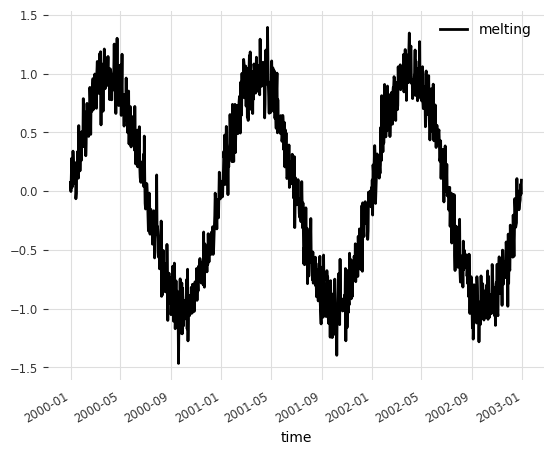

In [6]:
melting.plot()

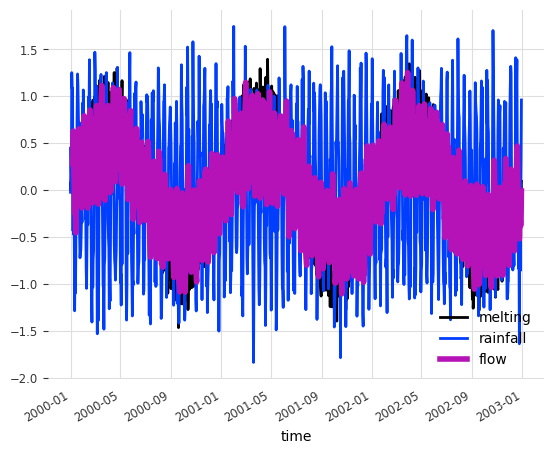

In [2]:




# Rainfalls: a sine with bi-weekly periodicity and additive white noise
rainfalls = (tg.sine_timeseries(length=LENGTH, 
                                value_frequency=(1/14), 
                                freq='D', 
                                column_name='rainfall')
             + 0.3 * tg.gaussian_timeseries(length=LENGTH, freq='D'))

# We scale and shift the melting by 5 days; giving us the melting contribution
melting_contribution = 0.5 * melting.shift(5)

# We compute similar contribution from the rainfalls
all_contributions = [melting_contribution] + [0.1 * rainfalls.shift(lag) for lag in range(5)]

# We compute the final flow as the sum of everything,
# trimming series so they all have the same start time
flow = sum([series[melting_contribution.start_time():][:melting.end_time()]
            for series in all_contributions]).with_columns_renamed('melting', 'flow')

# add some white noise
flow += 0.1 * tg.gaussian_timeseries(length=len(flow))

melting.plot()
rainfalls.plot()
flow.plot(lw=4)